### Final project

Analysis for the Titanic data set: "It Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic."

Types of graphic with matplotlib

Plotting methods allow for a handful of plot styles other than the default Line plot. These methods can be provided as the kind keyword argument to plot(). These include:

    -‘bar’ or ‘barh’ for bar plots
    -‘hist’ for histogram
    -‘box’ for boxplot
    -‘kde’ or 'density' for density plots
    -‘area’ for area plots
    -‘scatter’ for scatter plots
    -‘hexbin’ for hexagonal bin plots
    -‘pie’ for pie plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodecsv
import seaborn as sns

%matplotlib inline

In [2]:
# import the data
data = pd.read_csv('titanic_data.csv')
data.describe()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Analysis for survival
survived = data.sum()['Survived']
print(survived)

print('% of survival')
print(float(survived)/len(data))

342
% of survival
0.383838383838


### Information by class

Text(0.5,1,u'Class Distribution')

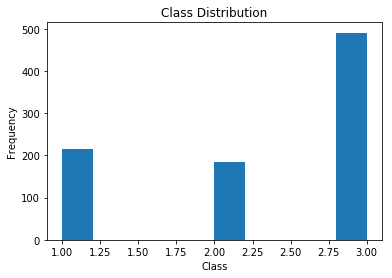

In [69]:
data.Pclass.plot(kind='hist')
plt.xlabel("Class")    
plt.title("Class Distribution")

### Information by Age

Text(0.5,1,u'Age Distribution')

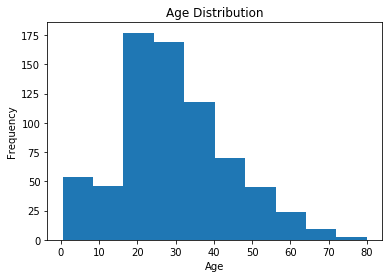

In [38]:
data.Age.plot(kind='hist')
plt.xlabel('Age')
plt.title('Age Distribution')

### Information by port of embarcation

([<matplotlib.axis.XTick at 0x1a1486d590>,
 <a list of 3 Text xticklabel objects>)

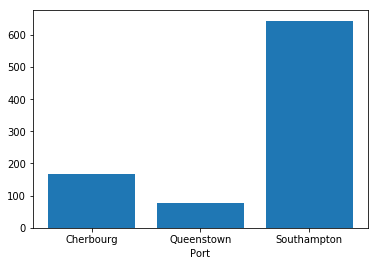

In [71]:
data_by_port = data.groupby('Embarked')
total = data_by_port['Survived'].count()

index = np.arange(len(data_by_port))
x_labels = ['Cherbourg','Queenstown','Southampton']

plt.xlabel('Port')
plt.bar(index, total)
plt.xticks(index, x_labels)

### Analysis by Age and class

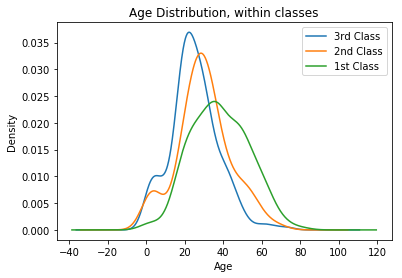

In [49]:
data.Age[data.Pclass == 3].plot(kind='kde')    
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 1].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution, within classes")
plt.legend(('3rd Class', '2nd Class','1st Class')) 

### Analysis by Age and Sex

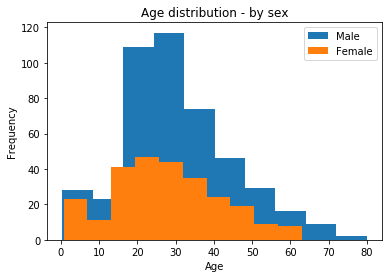

In [51]:
data.Age[data.Sex == 'male'].plot(kind='hist')
data.Age[data.Sex == 'female'].plot(kind='hist')
plt.xlabel('Age')
plt.title('Age distribution - by sex')
plt.legend(('Male', 'Female'))

### Analysis by Age and class

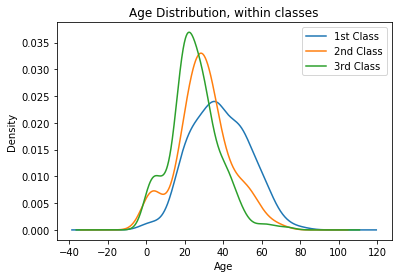

In [4]:
data.Age[data.Pclass == 1].plot(kind='kde')    
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution, within classes")
plt.legend(('1st Class', '2nd Class','3rd Class')) 

### Analysis Survived by Pclass

In [63]:
data_by_class = data.groupby('Pclass')
total = data_by_class['Survived'].count()
survived = data_by_class['Survived'].sum()
not_survived= total - survived
perc_survived = (survived) / (total)
print(perc_survived)

index = np.arange(len(data_by_class))
x_labels = ['Class1','Class2','Class3']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


([<matplotlib.axis.XTick at 0x1a2511c810>,
 <a list of 3 Text xticklabel objects>)

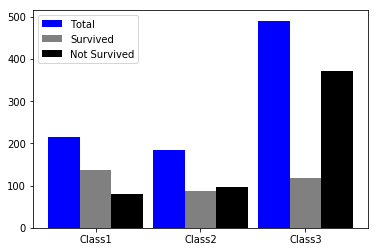

In [71]:
plt.bar(index,total,color='blue', width=0.3)
plt.bar(index+0.3,survived, color='grey',width=0.3)
plt.bar(index+0.6,not_survived, color='black',width=0.3)
plt.legend(('Total','Survived','Not Survived'),loc='best')
plt.xticks(index+0.3, x_labels)

### Analysis Survived by Age

In [10]:
data_by_age = data.groupby(pd.cut(data['Age'],[0,10,20,28,40,50,100]))
total = data_by_age['Survived'].count()
survived = data_by_age['Survived'].sum()
perc_survived = survived / total

print(perc_survived)

Age
(0, 10]      0.593750
(10, 20]     0.382609
(20, 28]     0.360656
(28, 40]     0.430693
(40, 50]     0.383721
(50, 100]    0.343750
Name: Survived, dtype: float64


In [17]:
index = np.arange(len(data_by_age))
x_labels = ['0-10','10-20','20-28','28-40','40-50','50-100']

([<matplotlib.axis.XTick at 0x1a187f4c50>,
 <a list of 6 Text xticklabel objects>)

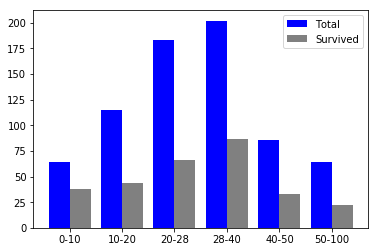

In [28]:
plt.bar(index, total, color = 'blue', width=0.4)
plt.bar(index+0.4, survived, color = 'gray', width=0.4)
plt.legend(('Total','Survived'),loc='best')
plt.xticks(index+0.2, x_labels)

### Analysis Survived by Sex

In [17]:
data_by_sex = data.groupby(['Sex'])
total = data_by_sex['Survived'].count()
survived = data_by_sex['Survived'].sum()
perc_survived = survived / total

print(perc_survived)
print(survived)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Sex
female    233
male      109
Name: Survived, dtype: int64


### Analysis Survived by Class and Sex

In [53]:
data_by_class_sex = data.groupby(['Pclass','Sex'])

total_males = []
total_females = []
males_survived = []
females_survived = []

for i in range(1,4):
    total_males.append(data_by_class_sex['Survived'].count()[i][1])
    total_females.append(data_by_class_sex['Survived'].count()[i][0])
    males_survived.append(data_by_class_sex['Survived'].sum()[i][1])
    females_survived.append(data_by_class_sex['Survived'].sum()[i][0])

print(total_males)
print(total_females)
print(males_survived)
print(females_survived)

[122, 108, 347]
[94, 76, 144]
[45, 17, 47]
[91, 70, 72]


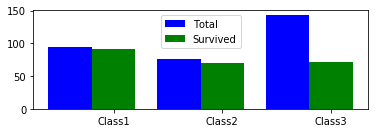

In [54]:
#Information for females
index = np.arange(3)
ax2 = plt.subplot2grid((2,2),(0,0),colspan=2)

rects1 = ax2.bar(index,total_females,width=0.4,color='blue')
rects2 = ax2.bar(index+0.4,females_survived,width=0.4,color='green')
ax2.set_xticks(index+0.4)
ax2.set_xticklabels(('Class1','Class2','Class3'))
ax2.legend((rects1[0],rects2[0]),('Total','Survived'),loc='best')

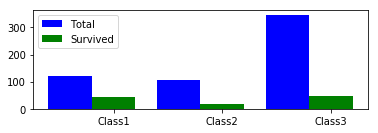

In [55]:
#Information for males
index = np.arange(3)
ax2 = plt.subplot2grid((2,2),(0,0),colspan=2)

rects1 = ax2.bar(index,total_males,width=0.4,color='blue')
rects2 = ax2.bar(index+0.4,males_survived,width=0.4,color='green')
ax2.set_xticks(index+0.4)
ax2.set_xticklabels(('Class1','Class2','Class3'))
ax2.legend((rects1[0],rects2[0]),('Total','Survived'),loc='best')

### Analysis Survived by Port

In [75]:
data_by_port = data.groupby('Embarked')
total = data_by_port['Survived'].count()
survived = data_by_port['Survived'].sum()
perc_survived = survived / total

print(perc_survived)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


([<matplotlib.axis.XTick at 0x1a140fb590>,
 <a list of 3 Text xticklabel objects>)

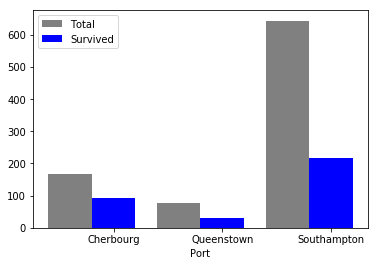

In [79]:
index = np.arange(len(data_by_port))
x_labels = ['Cherbourg','Queenstown','Southampton']

plt.xlabel('Port')
plt.bar(index, total, width = 0.4, color= 'gray')
plt.bar(index+0.4, survived, width = 0.4, color= 'blue')
plt.legend(('Total','Survived'))
plt.xticks(index+0.4, x_labels)

### Analysis by Port and class

In [103]:
data_by_port_class = data.groupby(['Pclass','Embarked'])

total_class1 = data_by_port_class['Survived'].count()[1]
total_class2 = data_by_port_class['Survived'].count()[2]
total_class3 = data_by_port_class['Survived'].count()[3]

print(total_class1)
print(total_class2)
print(total_class3)

Embarked
C     85
Q      2
S    127
Name: Survived, dtype: int64
Embarked
C     17
Q      3
S    164
Name: Survived, dtype: int64
Embarked
C     66
Q     72
S    353
Name: Survived, dtype: int64


In [104]:
index = np.arange(len(data_by_port))
x_labels = ['Cherbourg','Queenstown','Southampton']

([<matplotlib.axis.XTick at 0x1a154d0810>,
 <a list of 3 Text xticklabel objects>)

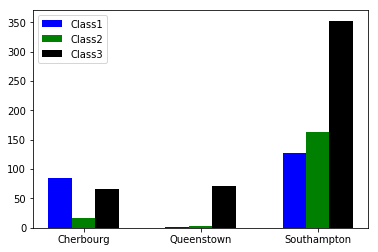

In [109]:
plt.bar(index, total_class1, color='blue', width=0.2)
plt.bar(index+0.2, total_class2, color='green', width=0.2)
plt.bar(index+0.4, total_class3, color='black', width=0.2)
plt.legend(('Class1','Class2','Class3'),loc='best')
plt.xticks(index+0.2, x_labels)